Run PCR-GLOBWB on https://github.com/UU-Hydro/PCR-GLOBWB_input_example/tree/master/RhineMeuse30min using 
1. Parametersetdb
2. grpc4bmi

In [1]:
from ewatercycle.parametersetdb import build_from_urls
from os.path import abspath
from os import mkdir

In [2]:
# Prepare input
parameter_set = build_from_urls(
    config_format='ini', config_url='https://raw.githubusercontent.com/UU-Hydro/PCR-GLOBWB_input_example/master/RhineMeuse30min/ini_and_batch_files/rapid/setup_natural_test.ini',
    datafiles_format='svn', datafiles_url='https://github.com/UU-Hydro/PCR-GLOBWB_input_example/trunk/RhineMeuse30min',
)

In [3]:
input_dir = abspath('./input')
# Write data files required by model to './input'
parameter_set.save_datafiles(input_dir)

Exception: Target directory already exists, will not overwrite

In [4]:
# Overwrite items in config file
# parameter_set.config for this model is a configparser.ConfigParser object
# inputDir and outputDir must be inside /data because grpc4bmi will mount input_dir output_dir as such inside container
parameter_set.config['globalOptions']['inputDir'] = input_dir
parameter_set.config['globalOptions']['outputDir'] = abspath('./output')
parameter_set.save_config('pcrg_rhinemeuse_ps.ini')
mkdir('./output')

FileExistsError: [Errno 17] File exists: './output'

In [5]:
from grpc4bmi.bmi_client_docker import BmiClientDocker

In [6]:
pcrg = BmiClientDocker(image='ewatercycle/pcrg-grpc4bmi:latest', image_port=55555, 
                       input_dirs=(input_dir,),
                       remove=True,
                       work_dir=".")

In [7]:
pcrg.initialize("pcrg_rhinemeuse_ps.ini")

In [4]:
tstart = pcrg.get_start_time()
tstep = pcrg.get_time_step()
print(tstart)

36525.0


In [5]:
%time pcrg.update_until(tstart + 100 * tstep)
print(pcrg.get_current_time())

CPU times: user 1.94 ms, sys: 4.95 ms, total: 6.9 ms
Wall time: 25.3 s
36625.0


In [13]:
variable = "discharge"
vals = pcrg.get_value(variable)
unit = pcrg.get_var_units(variable)
shape = pcrg.get_grid_shape(pcrg.get_var_grid(variable))

In [17]:
shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 masked_array(data=[          nan,           nan,           nan,
                              nan,           nan,           nan,
                              nan,           nan,           nan,
                              nan,           nan,           nan,
                              nan,           nan,           nan,
                              nan,           nan,           nan,
                              nan,           nan,           nan,
                              nan,           nan,  123.69875336,
                     245.86079407,  189.87820435,  102.55826569,
                     805.90692139,    9.74450207,   12.2488308 ,
                              nan,           nan,           nan,
                              nan,           nan,           nan,
                              nan,           nan,           nan,
               

[]

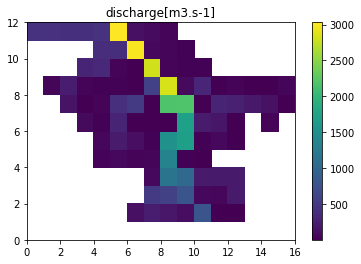

In [41]:
import matplotlib.pyplot as plt
import numpy
import numpy.ma as ma
missval = -999.
X, Y = numpy.arange(shape[1]), numpy.arange(shape[0])
Z = numpy.reshape(ma.masked_where(vals == numpy.nan, vals), shape)
plt.title(variable + '[' + unit + ']')
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.plot()

In [12]:
# Stop the Docker container
del pcrg

In [30]:
import cftime
from bokeh.plotting import output_notebook, figure, show

output_notebook()

time_unit = pcrg.get_time_units()
p = figure(plot_width=800, plot_height=400, x_axis_type="datetime")
p.xaxis.axis_label = variable + '[' + unit + ']'
p.line([cftime.num2date(d[0], time_unit) for d in variable_overtime], [d[1] for d in variable_overtime] , line_width=2)
show(p)

Loading BokehJS ...

NameError: name 'variable_overtime' is not defined

In [7]:
vals

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 123.6987533569336, 245.8607940673828, 189.87820434570312, 102.55826568603516, 805.9069213867188, 9.744502067565918, 12.248830795288086, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 506.7602844238281, 592.125, 805.9069213867188, 65.58396911621094, 57.335777282714844, 208.76861572265625, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 71.04727172851562, 1170.75, 1015.0010375976562, 208.76861572265625, 208.76861572265625, 208.76861572265625, nan, nan, nan, nan, nan, nan, nan, nan, 30.914560317993164, 69.40765380859375, 36.148681640625, 42.415069580078125, 1360.8189697265625, 18.650184631347656, 14.791960716247559, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 52.23804473876953, 226.76565551757812, 114.2984848022461, 20.962385177612305, 1525.0987548828125, 1703.5830078125, 18.503009796142578, 68.74242401123047, 5.60924768447876, nan, nan, nan, nan, nan, n

In [8]:
unit

'm3.s-1'

In [10]:
pcrg.get_grid_shape(0)

(13, 17)

In [15]:
len(vals)

221

In [16]:
221/13


17.0

In [34]:
pcrg.get_grid_x(0)

[46.25, 46.75, 47.25, 47.75, 48.25, 48.75, 49.25, 49.75, 50.25, 50.75, 51.25, 51.75, 52.25]

In [35]:
pcrg.get_grid_y(0)

[3.75, 4.25, 4.75, 5.25, 5.75, 6.25, 6.75, 7.25, 7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75]

In [37]:
vals

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 123.6987533569336, 245.8607940673828, 189.87820434570312, 102.55826568603516, 805.9069213867188, 9.744502067565918, 12.248830795288086, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 506.7602844238281, 592.125, 805.9069213867188, 65.58396911621094, 57.335777282714844, 208.76861572265625, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 71.04727172851562, 1170.75, 1015.0010375976562, 208.76861572265625, 208.76861572265625, 208.76861572265625, nan, nan, nan, nan, nan, nan, nan, nan, 30.914560317993164, 69.40765380859375, 36.148681640625, 42.415069580078125, 1360.8189697265625, 18.650184631347656, 14.791960716247559, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 52.23804473876953, 226.76565551757812, 114.2984848022461, 20.962385177612305, 1525.0987548828125, 1703.5830078125, 18.503009796142578, 68.74242401123047, 5.60924768447876, nan, nan, nan, nan, nan, n

In [38]:
Z

masked_array(
  data=[[          nan,           nan,           nan,           nan,
                   nan,           nan,           nan,           nan,
                   nan,           nan,           nan,           nan,
                   nan,           nan,           nan,           nan,
                   nan],
        [          nan,           nan,           nan,           nan,
                   nan,           nan,  123.69875336,  245.86079407,
          189.87820435,  102.55826569,  805.90692139,    9.74450207,
           12.2488308 ,           nan,           nan,           nan,
                   nan],
        [          nan,           nan,           nan,           nan,
                   nan,           nan,           nan,  506.76028442,
          592.125     ,  805.90692139,   65.58396912,   57.33577728,
          208.76861572,           nan,           nan,           nan,
                   nan],
        [          nan,           nan,           nan,           nan,
              

In [11]:
del pcrg